In [1]:
# Numerical libs
import numpy as np
import pandas as pd

# ML libs
from  sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
import os
from tqdm.notebook import tqdm

## Utils

## Load data

In [2]:
data = load_breast_cancer(as_frame=True)
X, y = data['data'], data['target']
df = pd.concat([X, y], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Classification

## Accuracy

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model = DecisionTreeClassifier(random_state=420) # Play with the parameters to get higher accuracy
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=420)

In [9]:
def accuracy(y_real, y_pred):
    return np.sum(y_pred == y_real) / len(y_real)

In [10]:
y_pred = model.predict(X_train)
print(f"Accuracy on train: {accuracy(y_train, y_pred)}")

y_pred = model.predict(X_test)
print(f"Accuracy on test: {accuracy(y_test, y_pred)}")

Accuracy on train: 1.0
Accuracy on test: 0.9385964912280702


In [11]:
# Predict classes
y_pred = model.predict(X_train)

In [15]:
accuracy_score(model.predict(X_train), y_train)

1.0

In [16]:
# using sklearn
accuracy_score(model.predict(X_test), y_test)

0.9385964912280702

## Confusion matrix

https://en.wikipedia.org/wiki/Confusion_matrix - wikipedia actually provides a good description

*Insert story with the wolf and the shepherd*


Assume the data is binary. Therefore we can split it into **positive** $(P)$ cases and **negative** $(N)$ cases
There are 4 cases we need to take into consideration:

**True positive**
- Model predicted **positive**, real data is **positive** $\to$ model is right

**True Negative**
- Model predicted **negative**, real data is **negative** $\to$ model is right

**False positive**
- Model predicted **positive**, real data is **negative** $\to$ model is wrong (false alarm)

**False Negative**
- Model predicted **negative**, real data is **positive** $\to$ model is wrong

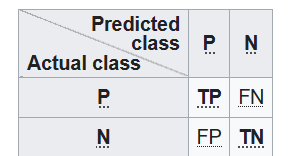
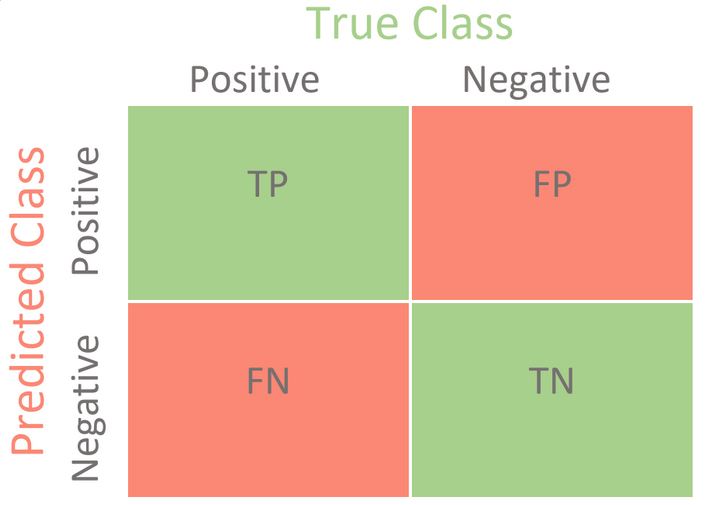

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
model = DecisionTreeClassifier(random_state=420) # Play with the parameters to get higher accuracy
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [19]:
def my_confusion_matrix(y_true, y_pred, class_names = None):
    if class_names is None:
        positive, negative = np.unique(y_true) #list of classes
    else:
        positive, negative = class_names
        
    p = np.sum(y_true == positive)
    n = np.sum(y_true == negative)
    
    tp = np.sum((y_true == y_pred) & (y_pred == positive)) # model is right, real data is positive
    tn = np.sum((y_true == y_pred) & (y_pred == negative)) # model is right, real data is negative
    fp = np.sum((y_true != y_pred) & (y_pred == positive)) # model is wrong, real data is negative (false alarm)
    fn = np.sum((y_true != y_pred) & (y_pred == negative)) # model is wrong, real data is positive
    
    return np.array([[tp, fn], [fp, tn]])
    

In [20]:
my_confusion_matrix(y_test, y_pred)

array([[40,  3],
       [ 4, 67]], dtype=int64)

In [21]:
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[40,  3],
       [ 4, 67]], dtype=int64)

<AxesSubplot:>

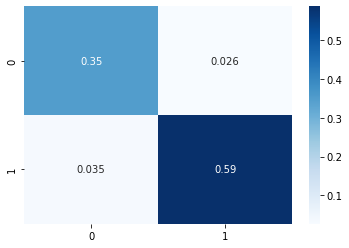

In [23]:
sns.heatmap(cm / np.sum(cm), annot = True, cmap = 'Blues')

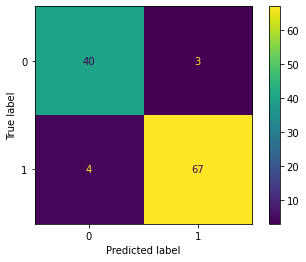

In [24]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()



## ROC-AUC

[Wiki entry](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

In [25]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

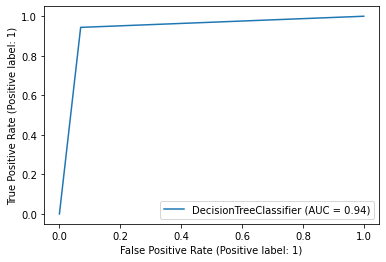

In [26]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Regression evaluation

When we evaluate a linear regression we want to look to minimize some error. *But what errors can we minimize?*

Let
- $N$ = number of datapoints
- $y_i$ = real output
- $h(x_i)$ = predicted output

## MAE - Mean absolute error

Average the errors. $MAE \in \mathbb{R}$

$$MAE = \dfrac 1 N \sum_{i=1}^N |y_i - h(x_i)|$$



## MSE

Square the errors then average them. $MSE \in \mathbb{R}$

$$MSE = \dfrac 1 N \sum_{i=1}^N (y_i - h(x_i))^2$$

### MAE vs MSE

Since $MSE$ squares the errors it means big errors get bigger => outliers bring $MSE$ up => Sensible to outliers
- $\pm$ Optimizing by $MSE$ takes outliers more into consideration.
- $+$ Easily differentiable

$MAE$ is more robust when it comes to outliers. It is not suitable for applications where you want to pay more attention to the outliers

## $R^2$

We compare our model with a baseline model. $R^2 \in [-\infty, 1]$

$$ R^2 = 1 - \dfrac {MSE(model)} {MSE(baseline)}$$

where
- $MSE(model)  = \dfrac 1 N \sum_{i=1}^N (y_i - h(x_i))^2$
- $MSE(baseline)  = \dfrac 1 N \sum_{i=1}^N (y_i - \mu_y)^2$
    - $\mu_y$ = the mean of the real data $y$
    
**Remarks**
- If our model does worse than the baseline $R^2 < 0$
- If our model is the baseline $R^2 = 0$
- If our model is perfect $R^2 = 1$

In [27]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
def mae(y_real, y_pred):
    return np.sum(np.abs(y_real - y_pred)) / len(y_real)

def mse(y_real, y_pred):
    # **2 is elementwise for np.array
    return np.sum((y_real - y_pred) ** 2) / len(y_real)

def r_square(y_real, y_pred):
    mse_model = np.sum((y_real - y_pred) ** 2) / len(y_real)
    mse_baseline = np.sum((y_real - y_real.mean()) ** 2) / len(y_real)
    
    return 1 - mse_model/mse_baseline
    

In [29]:
data = fetch_california_housing(data_home=os.path.join('..', 'data'), as_frame=True)
X, y = data['data'], data['target']
df = pd.concat([X, y], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
X = df.drop(columns = ['MedHouseVal'])
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
print(f"Training scores (MAE, MSE, R^2): : {mae(y_train, y_pred), mse(y_train, y_pred), r_square(y_train, y_pred)}")

y_pred = reg.predict(X_test)
print(f"Test scores (MAE, MSE, R^2): {mae(y_test, y_pred), mse(y_test, y_pred), r_square(y_test, y_pred)}")

Training scores (MAE, MSE, R^2): : (0.5286283596581925, 0.5179331255246699, 0.6125511913966951)
Test scores (MAE, MSE, R^2): (0.5332001304956557, 0.5558915986952441, 0.575787706032451)
